In [1]:
#from __future__ import print_function, division

import numpy as np
import matplotlib.pyplot as plt

import xpsi
from xpsi import HotRegions
from xpsi.global_imports import gravradius

import sys
sys.path.append('../')
from custom_tools import CustomPhotosphere_Bobrikova, CustomHotRegion_Accreting


# spacetime

# spacetime = xpsi.Spacetime.fixed_spin(300.0)


bounds = dict(distance = (0.1, 1.0),                     # (Earth) distance
                mass = (1.0, 3.0),                       # mass
                radius = (3.0 * gravradius(1.0), 16.0),  # equatorial radius
                cos_inclination = (0.0, 1.0))      # (Earth) inclination to rotation axis

spacetime = xpsi.Spacetime(bounds=bounds, values=dict(frequency=300.0))


# hotregions

bounds = dict(super_colatitude = (None, None),
              super_radius = (None, None),
              phase_shift = (0.0, 0.1),
              super_tbb = (0.00015, 0.003),
              super_te = (40., 200.),
              super_tau = (0.5, 3.5))

primary = CustomHotRegion_Accreting(bounds=bounds,
   	                    values={},
   	                    symmetry=False, #call general integrator instead of for azimuthal invariance
   	                    omit=False,
   	                    cede=False,
   	                    concentric=False,
   	                    sqrt_num_cells=32,
   	                    min_sqrt_num_cells=10,
   	                    max_sqrt_num_cells=64,
   	                    num_leaves=100,
   	                    num_rays=200,
   	                    prefix='p')


hot = HotRegions((primary,))

# photosphere
photosphere = CustomPhotosphere_Bobrikova(hot = hot, elsewhere = None,
                                values=dict(mode_frequency = spacetime['frequency']))
photosphere.hot_atmosphere = '/home/bas/Documents/Projects/x-psi/model_datas/bobrikova/Bobrikova_compton_slab.npz'

/=============================================\
| X-PSI: X-ray Pulse Simulation and Inference |
|---------------------------------------------|
|                Version: 2.0.0               |
|---------------------------------------------|
|      https://xpsi-group.github.io/xpsi      |
\=============================================/

Imported GetDist version: 1.4
Imported nestcheck version: 0.2.1
Creating parameter:
    > Named "frequency" with fixed value 3.000e+02.
    > Spin frequency [Hz].
Creating parameter:
    > Named "mass" with bounds [1.000e+00, 3.000e+00].
    > Gravitational mass [solar masses].
Creating parameter:
    > Named "radius" with bounds [4.430e+00, 1.600e+01].
    > Coordinate equatorial radius [km].
Creating parameter:
    > Named "distance" with bounds [1.000e-01, 1.000e+00].
    > Earth distance [kpc].
Creating parameter:
    > Named "cos_inclination" with bounds [0.000e+00, 1.000e+00].
    > Cosine of Earth inclination to rotation axis.
Creating parameter:
 

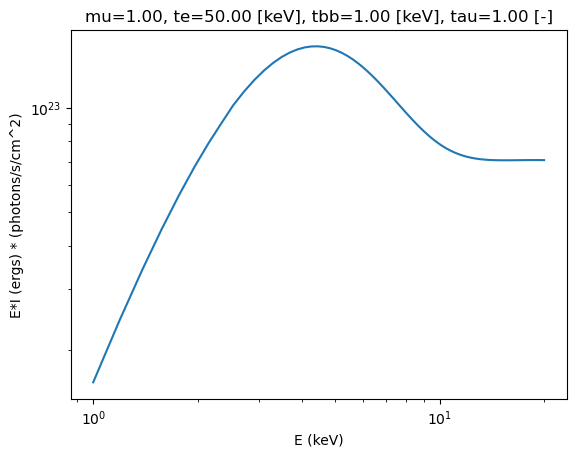

In [2]:
Emin = 1 #min = 0.1020
Emax = 20 #max = 1020

length = 100
E = np.linspace(Emin, Emax, length) #keV
E_erg = E*1.602e-9 #ergs
mu = 1 # cos(zenith angle)
mu_array = np.ones(length) * mu
t_e = 50 #keV
t_bb = 1 #keV
tau = 1 #unitless
local_vars = np.array([[t_e/0.511, t_bb/511, tau]]*length)

hot_I = xpsi.surface_radiation_field.intensity(E, mu_array, local_vars,
                                               atmosphere=photosphere.hot_atmosphere,
                                               extension='hot',
                                               numTHREADS=8) # photons/s/keV/cm^2



fig, ax = plt.subplots()
ax.loglog(E, hot_I*E*E_erg)
ax.set_title('mu={:0.2f}, te={:.2f} [keV], tbb={:.2f} [keV], tau={:.2f} [-]'.format(mu, t_e, t_bb, tau), loc='center') #unit conversion te and tbb is different due to a cluster leftover according to Anna B.
ax.set_xlabel('E (keV)')
ax.set_ylabel('E*I (ergs) * (photons/s/cm^2)')
plt.show()

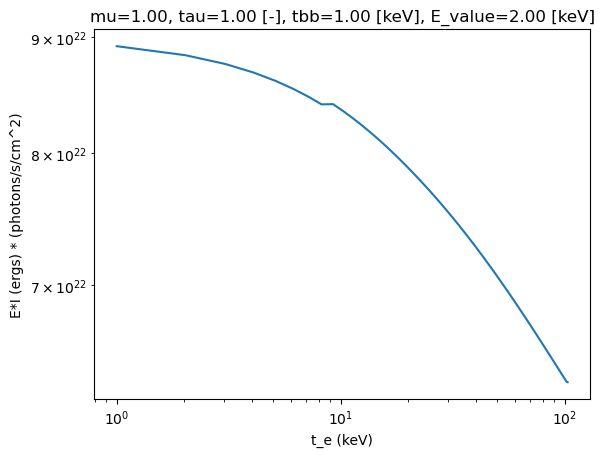

In [3]:
length = 100
E_value = 2
E = E_value * np.ones(length) #keV
E_erg = E*1.602e-9 #ergs
mu_value = 1 # cos(zenith angle)
mu = np.ones(length) * mu_value

t_e_min = 1 # min = 20.4 
t_e_max = 103 # max = 103
t_e = np.linspace(t_e_min,t_e_max,length) #keV

t_bb_value=1
t_bb = np.ones(length)*t_bb_value #keV

tau_value=1
tau = np.ones(length)*tau_value #unitless
local_vars = np.ascontiguousarray(np.swapaxes(np.array((t_e/0.511, t_bb/511, tau)),0,1))

hot_I = xpsi.surface_radiation_field.intensity(E, mu_array, local_vars,
                                               atmosphere=photosphere.hot_atmosphere,
                                               extension='hot',
                                               numTHREADS=8) # photons/s/keV/cm^2



fig, ax = plt.subplots()
ax.loglog(t_e, hot_I*E*E_erg)
ax.set_title('mu={:0.2f}, tau={:.2f} [-], tbb={:.2f} [keV], E_value={:.2f} [keV]'.format(mu_value, tau_value, t_bb_value, E_value), loc='center') #unit conversion te and tbb is different due to a cluster leftover according to Anna B.
ax.set_xlabel('t_e (keV)')
ax.set_ylabel('E*I (ergs) * (photons/s/cm^2)')
plt.show()

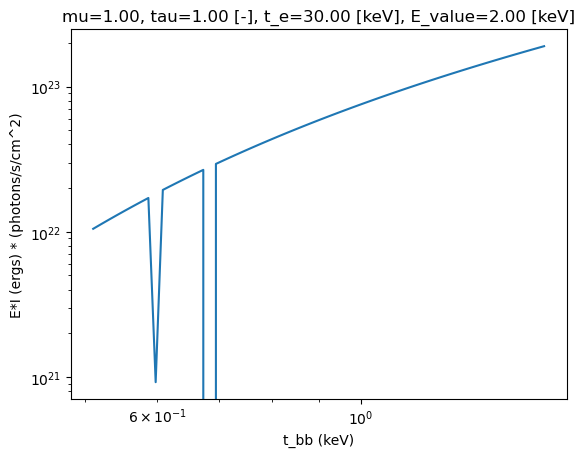

In [4]:
length = 100
E_value = 2
E = E_value * np.ones(length) #keV
E_erg = E*1.602e-9 #ergs
mu_value = 1 # cos(zenith angle)
mu = np.ones(length) * mu_value

t_e_value=30
t_e = np.ones(length)*t_e_value #keV

t_bb_min = 0.511 # min = 0.511
t_bb_max = 1.5841 # max = 1.5841
t_bb = np.linspace(t_bb_min,t_bb_max,length) #keV

tau_value=1
tau = np.ones(length)*tau_value #unitless
local_vars = np.ascontiguousarray(np.swapaxes(np.array((t_e/0.511, t_bb/511, tau)),0,1))

hot_I = xpsi.surface_radiation_field.intensity(E, mu_array, local_vars,
                                               atmosphere=photosphere.hot_atmosphere,
                                               extension='hot',
                                               numTHREADS=8) # photons/s/keV/cm^2



fig, ax = plt.subplots()
ax.loglog(t_bb, hot_I*E*E_erg)
ax.set_title('mu={:0.2f}, tau={:.2f} [-], t_e={:.2f} [keV], E_value={:.2f} [keV]'.format(mu_value, tau_value, t_e_value, E_value), loc='center') #unit conversion te and tbb is different due to a cluster leftover according to Anna B.
ax.set_xlabel('t_bb (keV)')
ax.set_ylabel('E*I (ergs) * (photons/s/cm^2)')
plt.show()

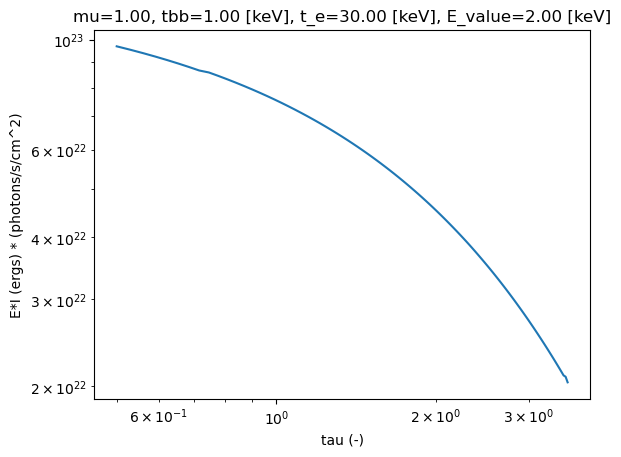

In [5]:
length = 100
E_value = 2
E = E_value * np.ones(length) #keV
E_erg = E*1.602e-9 #ergs
mu_value = 1 # cos(zenith angle)
mu = np.ones(length) * mu_value

t_e_value=30
t_e = np.ones(length)*t_e_value #keV

t_bb_value=1
t_bb = np.ones(length)*t_bb_value #keV

tau_min = 0.5 # min = 0.5
tau_max = 3.55 # max = 3.55
tau = np.linspace(tau_min,tau_max,length) #unitless

local_vars = np.ascontiguousarray(np.swapaxes(np.array((t_e/0.511, t_bb/511, tau)),0,1))

hot_I = xpsi.surface_radiation_field.intensity(E, mu_array, local_vars,
                                               atmosphere=photosphere.hot_atmosphere,
                                               extension='hot',
                                               numTHREADS=8) # photons/s/keV/cm^2



fig, ax = plt.subplots()
ax.loglog(tau, hot_I*E*E_erg)
ax.set_title('mu={:0.2f}, tbb={:.2f} [keV], t_e={:.2f} [keV], E_value={:.2f} [keV]'.format(mu_value, t_bb_value, t_e_value, E_value), loc='center') #unit conversion te and tbb is different due to a cluster leftover according to Anna B.
ax.set_xlabel('tau (-)')
ax.set_ylabel('E*I (ergs) * (photons/s/cm^2)')
plt.show()

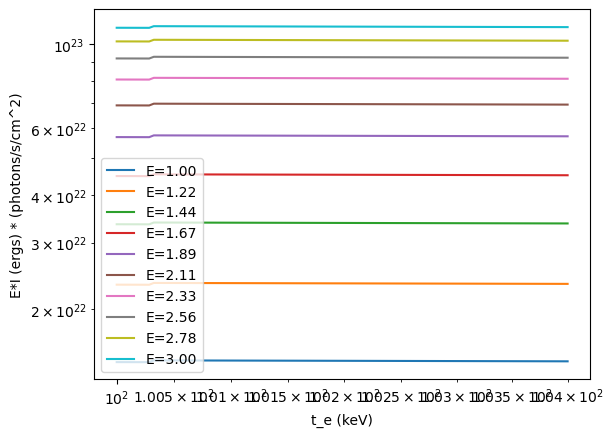

In [6]:
number = 10
length = 100

Emin = 1 #min = 0.1020
Emax = 3 #max = 1020
Es = np.linspace(Emin, Emax, number) #keV

fig, ax = plt.subplots()

for E_value in Es:
    E = E_value * np.ones(length) #keV
    E_erg = E*1.602e-9 #ergs
    
    mu_value = 1 # cos(zenith angle)
    mu = np.ones(length) * mu_value

    t_e_min = 100 # min = 20.4 
    t_e_max = 104 # max = 103
    t_e = np.linspace(t_e_min,t_e_max,length) #keV

    t_bb_value=1
    t_bb = np.ones(length)*t_bb_value #keV

    tau_value=1
    tau = np.ones(length)*tau_value #unitless
    local_vars = np.ascontiguousarray(np.swapaxes(np.array((t_e/0.511, t_bb/511, tau)),0,1))

    hot_I = xpsi.surface_radiation_field.intensity(E, mu_array, local_vars,
                                                   atmosphere=photosphere.hot_atmosphere,
                                                   extension='hot',
                                                   numTHREADS=8) # photons/s/keV/cm^2




    ax.loglog(t_e, hot_I*E*E_erg,label='E={:.2f}'.format(E_value))

ax.set_xlabel('t_e (keV)')
ax.set_ylabel('E*I (ergs) * (photons/s/cm^2)')
        
plt.legend()
plt.show()

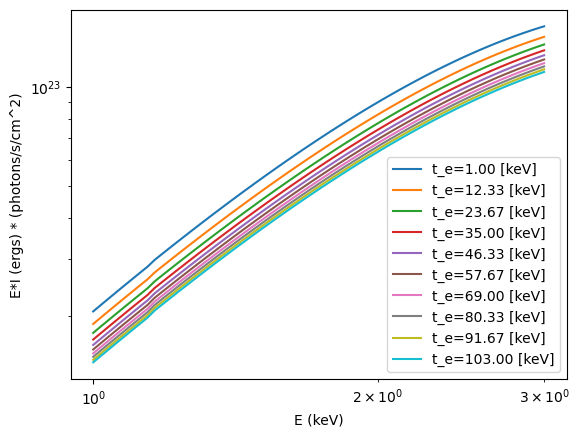

In [7]:
number = 10
length = 100



t_e_min = 1 # min = 20.4 
t_e_max = 103 # max = 103
t_es = np.linspace(t_e_min, t_e_max, number) #keV



fig, ax = plt.subplots()

for t_e_value in t_es:
    Emin = 1 #min = 0.1020
    Emax = 3 #max = 1020
    
    E = np.linspace(Emin, Emax, length) #keV
    E_erg = E*1.602e-9 #ergs
    
    mu_value = 1 # cos(zenith angle)
    mu = np.ones(length)*mu_value

    t_e = np.ones(length)*t_e_value #keV

    t_bb_value=1
    t_bb = np.ones(length)*t_bb_value #keV

    tau_value=1
    tau = np.ones(length)*tau_value #unitless

    local_vars = np.ascontiguousarray(np.swapaxes(np.array((t_e/0.511, t_bb/511, tau)),0,1))

    hot_I = xpsi.surface_radiation_field.intensity(E, mu_array, local_vars,
                                                   atmosphere=photosphere.hot_atmosphere,
                                                   extension='hot',
                                                   numTHREADS=8) # photons/s/keV/cm^2




    ax.loglog(E, hot_I*E*E_erg,label='t_e={:.2f} [keV]'.format(t_e_value))

ax.set_xlabel('E (keV)')
ax.set_ylabel('E*I (ergs) * (photons/s/cm^2)')
        
plt.legend()
plt.show()

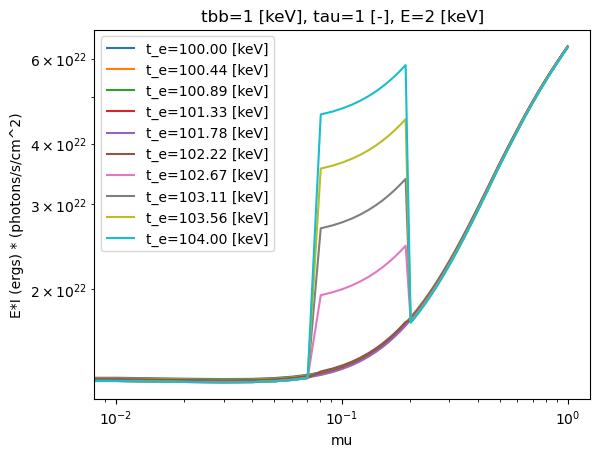

In [23]:
number = 10
length = 100


t_e_min = 100 # min = 20.4 
t_e_max = 104 # max = 103
t_es = np.linspace(t_e_min, t_e_max, number) #keV


fig, ax = plt.subplots()

for t_e_value in t_es:
    mu_min = 0 #min = 0
    mu_max = 1 #max = 1
    mu = np.linspace(mu_min, mu_max, length)

    E_value = 2
    E = np.ones(length)*E_value
    E_erg = E*1.602e-9 #ergs

    t_e = np.ones(length)*t_e_value #keV
    t_bb_value=1
    t_bb = np.ones(length)*t_bb_value #keV
    tau_value=1
    tau = np.ones(length)*tau_value #keV


    local_vars = np.ascontiguousarray(np.swapaxes(np.array((t_e/0.511, t_bb/511, tau)),0,1))

    hot_I = xpsi.surface_radiation_field.intensity(E, mu, local_vars,
                                                   atmosphere=photosphere.hot_atmosphere,
                                                   extension='hot',
                                                   numTHREADS=8) # photons/s/keV/cm^2


    ax.loglog(mu, hot_I*E*E_erg,label='t_e={:.2f} [keV]'.format(t_e_value))

ax.set_xlabel('mu')
ax.set_ylabel('E*I (ergs) * (photons/s/cm^2)')

ax.set_title('tbb=1 [keV], tau=1 [-], E=2 [keV]')
ax.legend()
plt.show()

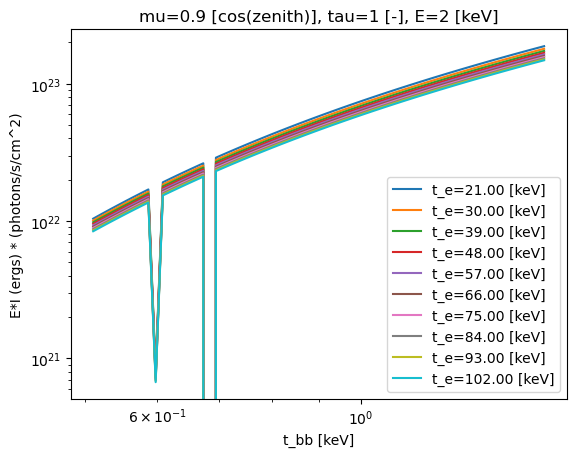

In [29]:
number = 10
length = 100


t_e_min = 21 # min = 20.4 
t_e_max = 102 # max = 103
t_es = np.linspace(t_e_min, t_e_max, number) #keV


fig, ax = plt.subplots()

for t_e_value in t_es:
    mu_value = 0.9
    mu = np.ones(length)*mu_value 

    E_value = 2
    E = np.ones(length)*E_value
    E_erg = E*1.602e-9 #ergs

    t_e = np.ones(length)*t_e_value #keV
    
    t_bb_min = 0.511 # min = 0.511
    t_bb_max = 1.5841 # max = 1.5841
    t_bb = np.linspace(t_bb_min,t_bb_max,length) #keV
    
    tau_value=1
    tau = np.ones(length)*tau_value #keV

    local_vars = np.ascontiguousarray(np.swapaxes(np.array((t_e/0.511, t_bb/511, tau)),0,1))

    hot_I = xpsi.surface_radiation_field.intensity(E, mu, local_vars,
                                                   atmosphere=photosphere.hot_atmosphere,
                                                   extension='hot',
                                                   numTHREADS=8) # photons/s/keV/cm^2

    ax.loglog(t_bb, hot_I*E*E_erg,label='t_e={:.2f} [keV]'.format(t_e_value))

ax.set_xlabel('t_bb [keV]')
ax.set_ylabel('E*I (ergs) * (photons/s/cm^2)')

ax.set_title('mu=0.9 [cos(zenith)], tau=1 [-], E=2 [keV]')
ax.legend()
plt.show()

/tmp/ipykernel_1569347/3612971229.py:74: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


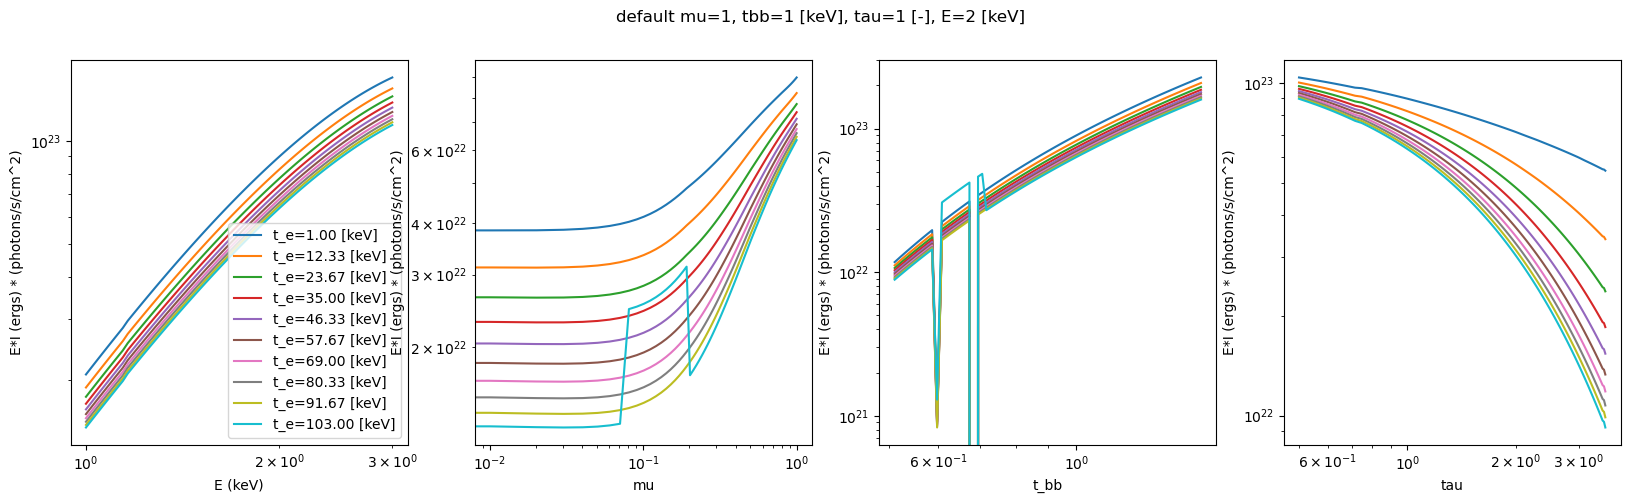

In [18]:
number = 10
length = 100



t_e_min = 1 # min = 20.4 
t_e_max = 103 # max = 103
t_es = np.linspace(t_e_min, t_e_max, number) #keV
n_parameters = [0,1,2,3]
labels = ['E (keV)', 'mu', 't_bb', 'tau']

fig, axes = plt.subplots(1,4, squeeze=True, figsize=(20,5))

for ax, n_parameter,label in zip(axes, n_parameters, labels):
    for t_e_value in t_es:
        t_e = np.ones(length)*t_e_value #keV

        if n_parameter == 0:
            E_min = 1 #min = 0.1020
            E_max = 3 #max = 1020
            E = np.linspace(Emin, Emax, length) #keV
        else:
            E_value = 2
            E = np.ones(length)*E_value
        E_erg = E*1.602e-9 #ergs

        if n_parameter == 1:
            mu_min = 0 #min = 0
            mu_max = 1 #max = 1
            mu = np.linspace(mu_min, mu_max, length)
        else:
            mu_value = 1
            mu = np.ones(length)*mu_value 

        if n_parameter == 2:
            t_bb_min = 0.511 # min = 0.511
            t_bb_max = 1.5841 # max = 1.5841
            t_bb = np.linspace(t_bb_min,t_bb_max,length) #keV
        else:
            t_bb_value=1
            t_bb = np.ones(length)*t_bb_value #keV

        if n_parameter == 3:
            tau_min = 0.5 # min = 0.5
            tau_max = 3.55 # max = 3.55
            tau = np.linspace(tau_min,tau_max,length) #unitless
        else:
            tau_value=1
            tau = np.ones(length)*tau_value #keV


        local_vars = np.ascontiguousarray(np.swapaxes(np.array((t_e/0.511, t_bb/511, tau)),0,1))

        hot_I = xpsi.surface_radiation_field.intensity(E, mu, local_vars,
                                                       atmosphere=photosphere.hot_atmosphere,
                                                       extension='hot',
                                                       numTHREADS=8) # photons/s/keV/cm^2



        if n_parameter == 0:
            ax.loglog(E, hot_I*E*E_erg,label='t_e={:.2f} [keV]'.format(t_e_value))
        elif n_parameter == 1:
            ax.loglog(mu, hot_I*E*E_erg,label='t_e={:.2f} [keV]'.format(t_e_value))
        elif n_parameter == 2:
            ax.loglog(t_bb, hot_I*E*E_erg,label='t_e={:.2f} [keV]'.format(t_e_value))
        elif n_parameter == 3:
            ax.loglog(tau, hot_I*E*E_erg,label='t_e={:.2f} [keV]'.format(t_e_value))

    ax.set_xlabel(label)
    ax.set_ylabel('E*I (ergs) * (photons/s/cm^2)')
axes[0].legend()
fig.suptitle('default mu=1, tbb=1 [keV], tau=1 [-], E=2 [keV]')
fig.show()